In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df = pd.read_excel("Boekenlijst.xlsx")

In [23]:
df.head(20)

,ID,Titel,Aantal Bladzijde,Dikte
0,1,Werken met logistiek,470,22
1,2,Dark Money,449,37
2,3,CRM in de Praktijk,295,24
3,4,Organisatie en Management,528,26
4,5,1491,549,29
5,6,The shallows,280,19
6,7,Ready player one,372,24
7,8,21 lessons in the 21th century,352,28
8,9,Aninal Farm,102,7
9,10,Nineteen eighty-four,325,27


In [13]:
df.columns

Index(['ID', 'Titel', 'Aantal Bladzijde', 'Dikte'], dtype='object')

In [14]:
x = df['Aantal Bladzijde'].tolist()
y = df['Dikte'].tolist()

<AxesSubplot:>

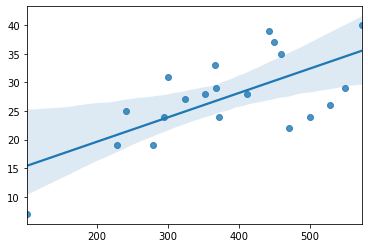

In [15]:
sns.regplot(x=x, y=y)